# EDA Анализ: Bird Strikes Dataset
## Цель исследования:
Оценить качество данных о столкновениях птиц с воздушными судами по трем ключевым метрикам:
1. **Completeness** - Полнота данных
2. **Uniqueness** - Уникальность записей  
3. **Outlier Ratio** - Доля выбросов
## Объект исследования:
Датасет содержит информацию об инцидентах столкновений птиц с самолетами за период 2000-2011 годы.
#Информация о датасете

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
sns.set(style="whitegrid", palette="pastel", font_scale=1.1)

df = pd.read_csv('bird_strikes.csv')

print(f"Размер датасета: {df.shape[0]} строк, {df.shape[1]} столбцов")
print("\nПервые 5 строк:")
display(df.head())
df.info()

Размер датасета: 65610 строк, 23 столбцов

Первые 5 строк:


,Airport: Name,Altitude bin,Aircraft: Make/Model,Effect: Impact to flight,FlightDate,Record ID,Effect: Indicated Damage,Aircraft: Number of engines?,Aircraft: Airline/Operator,Origin State,When: Phase of flight,Wildlife: Size,Wildlife: Species,When: Time (HHMM),When: Time of day,Pilot warned of birds or wildlife?,Cost: Aircraft time out of service (hours),Cost: Other (inflation adj),Cost: Repair (inflation adj),Cost: Total $,Miles from airport,Feet above ground,Speed (IAS) in knots
0,DETROIT METRO WAYNE COUNTY ARPT,< 1000 ft,A-319,NaN,2005-01-01,227413,No damage,2.0,NORTHWEST AIRLINES,Michigan,Climb,Medium,Unknown bird - medium,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,400.0,NaN
1,DANE COUNTY REGIONAL ARPT-TRUAX FLD,< 1000 ft,A-320,NaN,2005-01-01,226578,No damage,2.0,NORTHWEST AIRLINES,Wisconsin,Take-off run,Medium,Unknown bird - medium,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN
2,HOGUE ARPT,< 1000 ft,PA-46 MALIBU,NaN,2005-01-01,268383,Caused damage,1.0,PRIVATELY OWNED,Tennessee,Landing Roll,Large,White-tailed deer,NaN,Day,NaN,NaN,0.0,0.0,0.0,0.0,0.0,20.0
3,SACRAMENTO INTL,< 1000 ft,B-737-300,NaN,2005-01-01,229514,Caused damage,2.0,SOUTHWEST AIRLINES,California,Approach,Large,Greater white-fronted goose,2140.0,Night,True,NaN,0.0,NaN,NaN,NaN,500.0,142.0
4,GUARULHOS INTL,< 1000 ft,B-767-300,NaN,2005-01-01,225661,No damage,2.0,UNITED AIRLINES,NaN,Landing Roll,Medium,Unknown bird - medium,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65610 entries, 0 to 65609
Data columns (total 23 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Airport: Name                               65601 non-null  object 
 1   Altitude bin                                65610 non-null  object 
 2   Aircraft: Make/Model                        65610 non-null  object 
 3   Effect: Impact to flight                    3269 non-null   object 
 4   FlightDate                                  65610 non-null  object 
 5   Record ID                                   65610 non-null  int64  
 6   Effect: Indicated Damage                    65610 non-null  object 
 7   Aircraft: Number of engines?                42765 non-null  float64
 8   Aircraft: Airline/Operator                  65610 non-null  object 
 9   Origin State                                59163 non-null  object 
 10  When: Phas

# Метрика 1: Сompleteness - полнота данных

Сompleteness - полнота данных


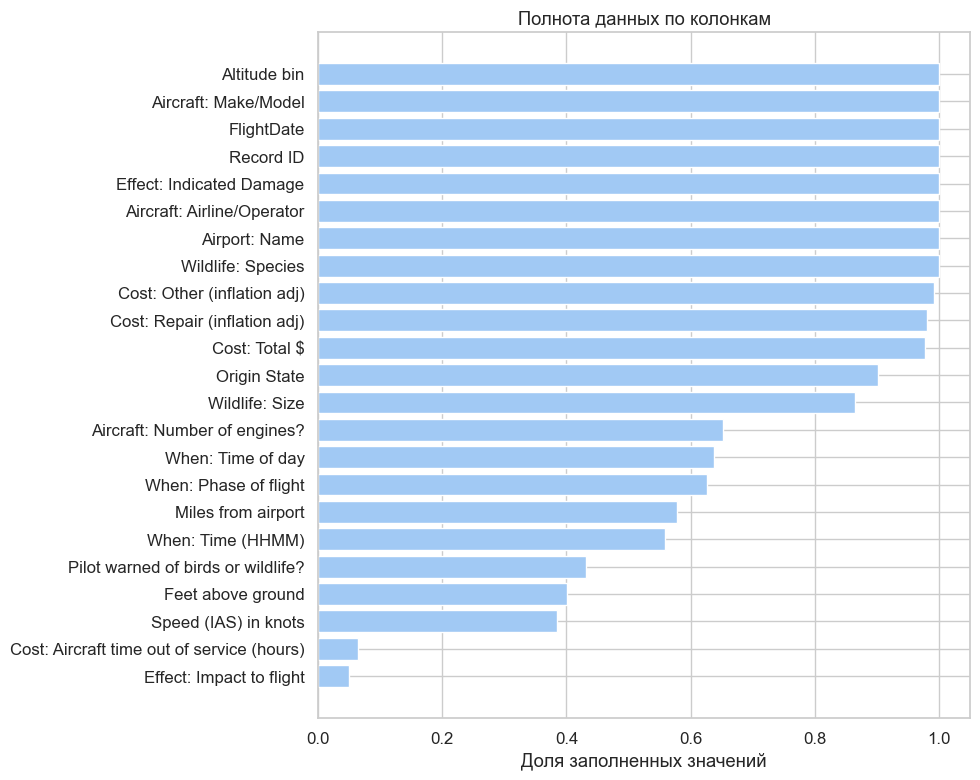

Средняя полнота: 0.743
Колонок с полнотой >90%: 12
Колонок с полнотой <50%: 5


In [10]:
# Метрика 1: Сompleteness - полнота данных
print("Сompleteness - полнота данных")

# Считаем полноту
completeness = 1 - (df.isnull().sum() / len(df))
completeness_df = completeness.reset_index()
completeness_df.columns = ['column', 'completeness']
completeness_df = completeness_df.sort_values('completeness')

# График
plt.figure(figsize=(10, 8))
plt.barh(completeness_df['column'], completeness_df['completeness'])
plt.title("Полнота данных по колонкам")
plt.xlabel("Доля заполненных значений")
plt.tight_layout()
plt.show()

avg_completeness = completeness.mean()
print(f"Средняя полнота: {avg_completeness:.3f}")
print(f"Колонок с полнотой >90%: {(completeness > 0.9).sum()}")
print(f"Колонок с полнотой <50%: {(completeness < 0.5).sum()}")

# Метрика 2: Uniqueness - уникальность

In [12]:
# Метрика 2: Uniqueness - уникальность
print("\nUniqueness - уникальность")

uniqueness_ratio = df.drop_duplicates().shape[0] / df.shape[0]
print(f"Уникальных строк: {df.drop_duplicates().shape[0]}")
print(f"Общее количество строк: {df.shape[0]}")
print(f"Отношение уникальных строк к общему: {uniqueness_ratio:.4f}")


Uniqueness - уникальность
Уникальных строк: 65610
Общее количество строк: 65610
Отношение уникальных строк к общему: 1.0000


# Метрика 3: Outlier Ratio - выбросы


Outlier Ratio - выбросы
Record ID: выбросов — 6108
When: Time (HHMM): выбросов — 0
Cost: Aircraft time out of service (hours): выбросов — 693
Feet above ground: выбросов — 4222
Speed (IAS) in knots: выбросов — 2443

Всего выбросов: 13466
Всего числовых значений: 158187
Доля выбросов: 0.0851


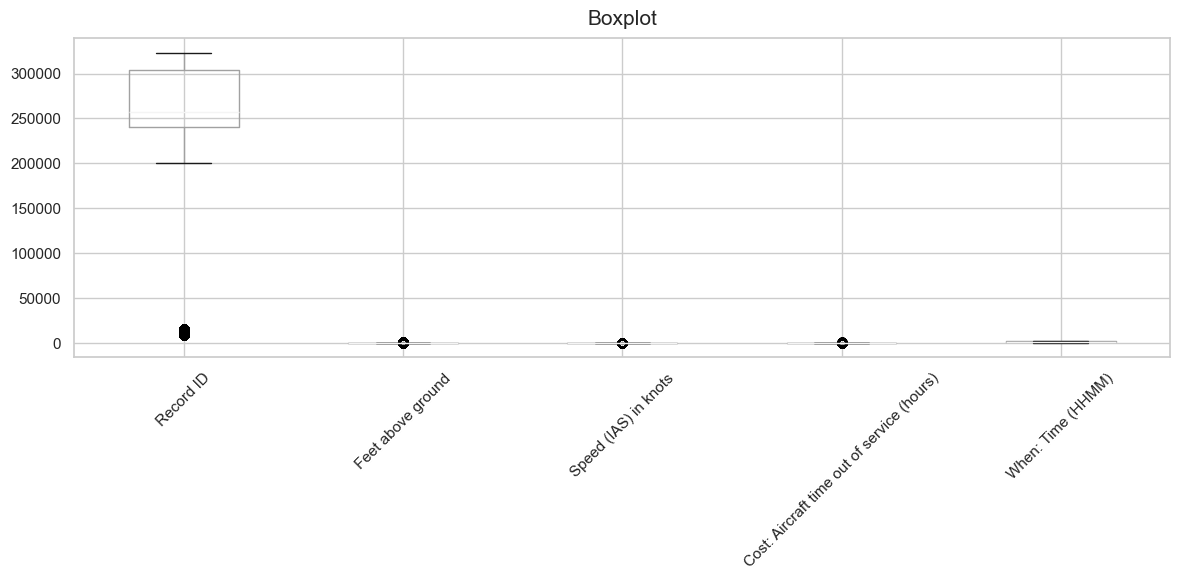

In [26]:
# Метрика 3: Outlier Ratio - выбросы
print("\nOutlier Ratio - выбросы")

# Берем только числовые колонки
numeric_columns = df.select_dtypes(include=[np.number]).columns

total_outliers = 0
total_values = 0


for col in numeric_columns:
    # Проверяем что в колонке есть данные
    if df[col].notna().sum() > 0:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1      
        
        # Если все значения одинаковые, пропускаем
        if iqr == 0:
            continue
            
        lower_bound = q1 - 1.5 * iqr  # Нижняя граница
        upper_bound = q3 + 1.5 * iqr  # Верхняя граница
        
        # Считаем выбросы
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_count = len(outliers)
        total_values += df[col].notna().sum()
        total_outliers += outlier_count
              
        # Сохраняем для анализа
        outlier_ratio = outlier_count / df[col].notna().sum()
        outliers_data.append({
            'column': col,
            'outliers': outlier_count,
            'outlier_ratio': outlier_ratio,
            'total_values': df[col].notna().sum()
        })
        
        print(f"{col}: выбросов — {outlier_count}")

# Общая статистика
if total_values > 0:
    outlier_ratio = total_outliers / total_values
    print(f"\nВсего выбросов: {total_outliers}")
    print(f"Всего числовых значений: {total_values}")
    print(f"Доля выбросов: {outlier_ratio:.4f}")

# График

# Берем топ-5 колонок с наибольшим количеством выбросов
top_outlier_cols = outliers_df.nlargest(5, 'outliers')['column'].tolist()

plt.figure(figsize=(12,6))
df[top_outlier_cols].boxplot()
plt.title("Boxplot", fontsize=15, pad=10)
plt.xticks(rotation=45, fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.show()

## Выводы по результатам анализа данных

#### 1. Completeness (Полнота данных)
- **Общая полнота: 74.3%**
- **12 колонок** имеют отличную заполненность (>90%)
- **5 колонок** проблемные (<50% заполненности)

#### 2. Uniqueness (Уникальность)
- **100% уникальных записей** 
- **Отсутствуют дубликаты** - данные не содержат повторяющихся строк

#### 3: Outlier Ratio (Выбросы)
- **Общая доля выбросов: 8.51%**
- **13,466 выбросов** из 158,187 числовых значений
- **Record ID**: 6,108 выбросов (закономерно для идентификаторов)

Данные готовы для дальнейшего анализа.